In [1]:
import datetime as dt

import scipy as sp
import numpy as np

from bokeh.io import output_notebook
from bokeh.layouts import row, column, gridplot
from bokeh.plotting import show

from ch2.data import *
from ch2.lib import *

s = session('-v5')

    INFO: Using database at /home/andrew/.ch2/database.sqlr


In [2]:
df = statistics(s, POWER, POWER_HR, POWER_HR_LAG, WIND_SPEED, WIND_HEADING)
df.describe()

,Power,Power / HR,Power / HR Lag,Wind Speed,Wind Heading
count,726512.000000,2.520000e+02,252.000000,252.000000,252.000000
mean,767.376120,3.283631e+05,132.342113,12.159451,178.052109
std,6181.618527,3.284483e+06,218.409923,39.361345,89.641166
min,0.000000,-8.105128e+05,1.004788,0.000686,0.358861
25%,0.000000,4.057936e+03,54.439425,0.795364,109.872031
50%,45.165576,5.801411e+03,86.709676,1.738256,175.283592
75%,132.060552,8.919397e+03,123.214009,5.420444,242.205982
max,246444.118608,5.044974e+07,2361.151777,330.684718,359.998786


In [6]:
clean = df.loc[(df[POWER_HR] > 0) & (df[POWER_HR] < 2e4) & (df[POWER_HR_LAG] > -10) & (df[POWER_HR_LAG] < 200)]
#clean = df.dropna()
clean['slope'] = 60 / clean[POWER_HR]
clean.describe()

/home/andrew/project/ch2/choochoo/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Power,Power / HR,Power / HR Lag,Wind Speed,Wind Heading,slope
count,177.0,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.0,6058.535892,88.372704,1.981604,184.452173,0.011861
std,0.0,2982.182237,36.550628,2.059099,91.670093,0.004905
min,0.0,1791.699324,19.771548,0.001497,0.358861,0.003029
25%,0.0,4141.545402,59.807599,0.683756,108.905335,0.008590
50%,0.0,5423.584034,85.989527,1.297303,190.836635,0.011063
75%,0.0,6985.228926,106.130416,2.478090,253.388881,0.014487
max,0.0,19807.906803,191.235830,13.404662,359.042634,0.033488


count      181.000000
mean      6058.535892
std       2982.182237
min       1791.699324
25%       4141.545402
50%       5423.584034
75%       6985.228926
max      19807.906803
Name: Power / HR, dtype: float64
Power / HR 5007.865299614811


<IPython.core.display.Javascript object>


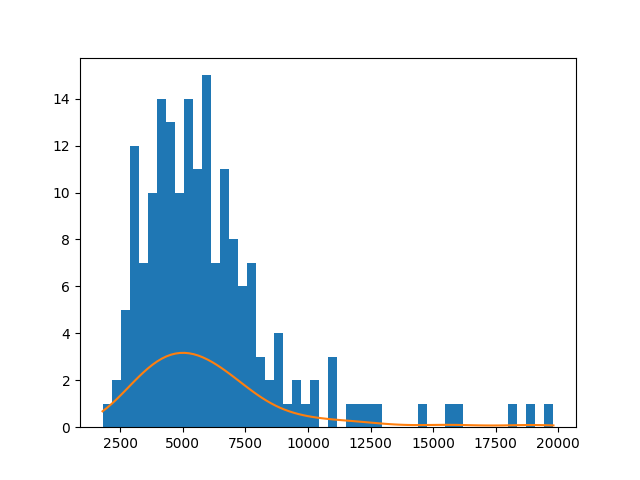

count    181.000000
mean       0.011861
std        0.004905
min        0.003029
25%        0.008590
50%        0.011063
75%        0.014487
max        0.033488
Name: slope, dtype: float64
slope 0.010015598707092083


<IPython.core.display.Javascript object>


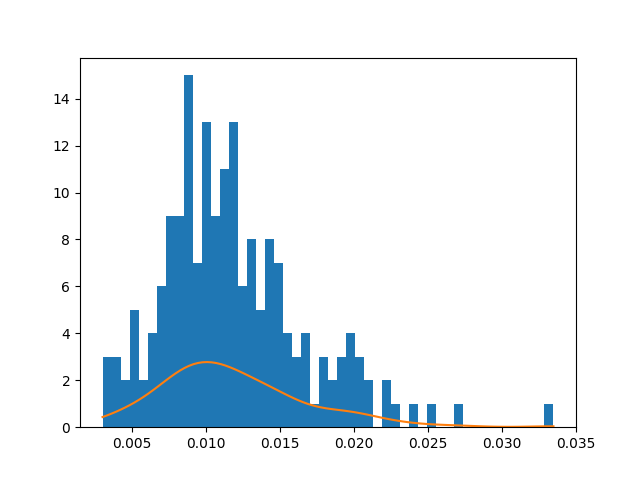

count    181.000000
mean      88.372704
std       36.550628
min       19.771548
25%       59.807599
50%       85.989527
75%      106.130416
max      191.235830
Name: Power / HR Lag, dtype: float64
Power / HR Lag 92.89424377985684


<IPython.core.display.Javascript object>


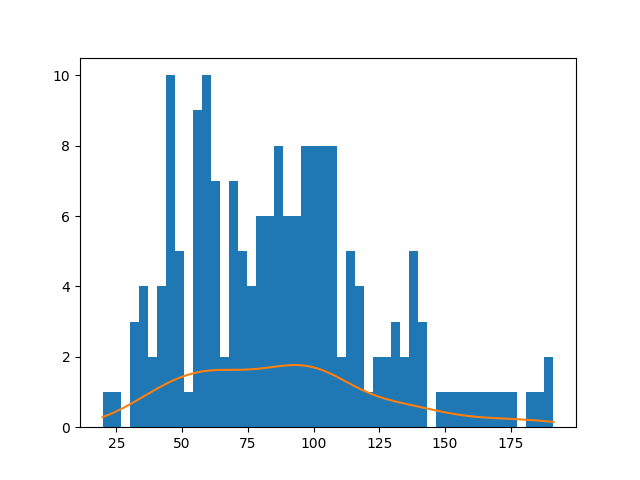

count    181.000000
mean       1.981604
std        2.059099
min        0.001497
25%        0.683756
50%        1.297303
75%        2.478090
max       13.404662
Name: Wind Speed, dtype: float64
Wind Speed 1.4863616445638448


<IPython.core.display.Javascript object>


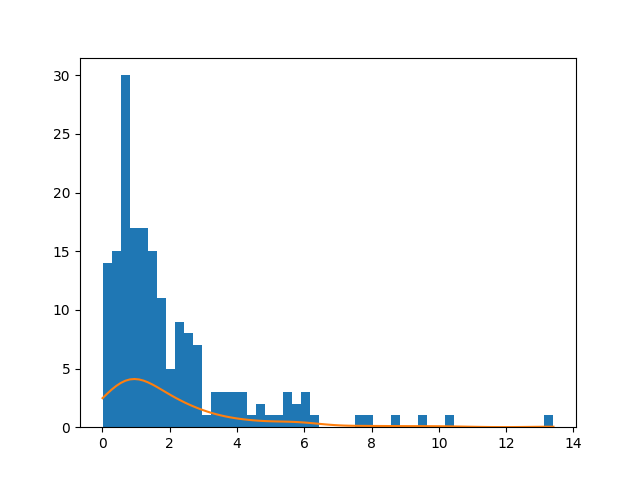

count    181.000000
mean     184.452173
std       91.670093
min        0.358861
25%      108.905335
50%      190.836635
75%      253.388881
max      359.042634
Name: Wind Heading, dtype: float64
Wind Heading 201.6698081931399


<IPython.core.display.Javascript object>


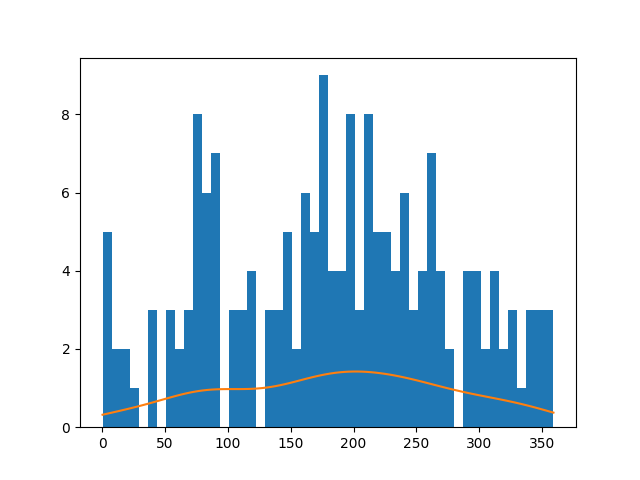

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

def find_max(kde, guess, lo=None, hi=None, dx_min=1e-3, samples=10):
    if lo is None: lo = 0.8 * guess
    if hi is None: hi = 1.2 * guess
    dx = hi - lo
    while dx > dx_min:
        x = np.linspace(lo, hi, samples)
        y = kde(x)
        guess = x[np.argmax(y)]
        lo = guess - dx / samples
        hi = guess + dx / samples
        dx = hi - lo
    return guess

for name in (POWER_HR, 'slope', POWER_HR_LAG, WIND_SPEED, WIND_HEADING):
    print(clean[name].describe())
    mn, mx = min(clean[name].dropna()), max(clean[name].dropna())
    x = np.linspace(mn, mx, 100)
    kde = sp.stats.gaussian_kde(clean[name])
    print(name, find_max(kde, clean[name].mean()))
    plt.figure()
    plt.hist(clean[name], bins=50)
    plt.plot(x, kde(x) * (mx - mn))
    plt.show()


In [5]:
clean.loc[clean[WIND_SPEED] > 7]

,Power,Power / HR,Power / HR Lag,Wind Speed,Wind Heading,slope
Index,,,,,,
2016-07-12 11:19:07+00:00,0.0,10988.885847,45.830579,10.397857,17.432859,0.005460
2016-11-24 11:47:09+00:00,0.0,6595.852679,84.703872,8.788049,103.864468,0.009097
2017-04-06 10:13:29+00:00,0.0,4545.046677,34.558867,7.846278,172.317164,0.013201
2018-01-18 10:17:34+00:00,0.0,5226.916969,93.289923,7.616100,244.838201,0.011479
